# What is NetworkX?

From https://networkx.github.io/: "NetworkX is a Python language software package for the creation,
manipulation, and study of the structure, dynamics, and functions of complex networks."

Basically, the main features that I think make NetworkX stand out from other network analysis packages/programs are:

1. **Simple integrated visualization**: when working with networks, especially in social science applications, you're going to want to easily produce cross-sectional and time-series visualizations. NetworkX has some super simple visualization functions (e.g., `draw()`) that let you quickly generate views of the networks you're working with.
2. **Comically easy network statistics generation**: basically all of the statistics you're ever going to need to compute are immediately accessible through simple functions (`betweenness_centrality()`, `degree()`, `connected_components()`, etc.)
3. **Straightforward processing of nodes/edges**: NetworkX provides two functions, `nodes_iter()` and `edges_iter()`, which give you objects specifically designed for efficient iteration over all nodes/edges in your network, for example via a for loop

# Installing NetworkX

**Recommended method**: install the Anaconda Python distribution, https://www.continuum.io/downloads (it's free, and has Windows, OS X, and Linux versions). This ensures that not only will NetworkX be available, but also many other useful data manipulation/visualization packages like pandas, numpy, and matplotlib. Otherwise, you can use standard Python's pip tool to install it by following the instructions on this page: https://networkx.github.io/documentation/latest/install.html. You'll also want to install matplotlib (http://matplotlib.org/users/installing.html) if you want to produce the network visualizations.

# NetworkX Basics

## Building a Network

To construct a network from scratch, we begin by creating our graph object via `nx.Graph()`. Then we can add nodes or edges to our network using the `add_node()` and `add_edge()` functions, respectively. So, to make a simple network with 3 nodes (labeled 1, 2, and 3) and 2 edges (between 1 and 2 and between 2 and 3) [see Figure 1], we execute the following code:

In [239]:
import networkx as nx

cool_graph = nx.Graph()
cool_graph.add_node(1)
cool_graph.add_node(2)
cool_graph.add_node(3)
cool_graph.add_edge(1,2)
cool_graph.add_edge(2,3)

print(cool_graph.nodes())
print(cool_graph.edges())

[1, 2, 3]
[(1, 2), (2, 3)]


This output reveals the basics of how NetworkX represents the constituent parts of the graph: nodes are stored as individual objects (in this case, integers), while edges are stored as tuples of nodes. A huge part of the flexibility of NetworkX comes from the fact that literally any object you can create in Python can be used as nodes. So if we want a network of names, we can simply use String objects as nodes ("Vladimir", "Rosa", etc.), or if we want a network of temporal entities we can use Date objects, and so on (even a network of networks, if you dare). In the next section, we'll keep this in mind when illustrating some additional NetworkX features.

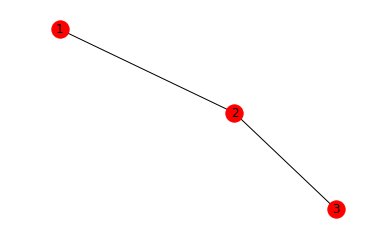

In [241]:
# Visualizing the network
import matplotlib.pyplot as plt
nx.draw_networkx(cool_graph)
plt.axis('off')
plt.show()

## Attributes

Although the ability to use anything as a node is cool, the real workhorse of NetworkX graphs is the ability to add custom attributes to nodes or edges. Like columns in a dataset, attributes in a NetworkX network are where the full set of information about the entities we're interested in can be stored. Attributes can be set for nodes/edges when the nodes/edges are created, or added on afterwards. As an example, let's construct a network of countries (Figure 2) where the nodes are String objects representing the country names and there is an edge between country A and country B if country A and B have established diplomatic relations.

In [242]:
country_graph = nx.Graph()

# GDP per capita from CIA World Factbook
country_graph.add_node("US", oecd=True, gdp_per_capita=54800)
country_graph.add_node("Cuba", oecd=False, gdp_per_capita=10200)
country_graph.add_node("China", oecd=False, gdp_per_capita=12900)
country_graph.add_node("NorthKorea", oecd=False, gdp_per_capita=1800)
country_graph.add_node("SouthKorea", oecd=False, gdp_per_capita=35400)

# Edge between A and B if A has diplomatic relations with B
country_graph.add_edge("US", "Cuba", since=2015)
country_graph.add_edge("US", "China", since=1979)
country_graph.add_edge("US", "SouthKorea", since=1948)
country_graph.add_edge("Cuba", "China", since=1960)
country_graph.add_edge("Cuba", "NorthKorea", since=1960)
country_graph.add_edge("China", "NorthKorea", since=1949)
country_graph.add_edge("China", "SouthKorea", since=1992)

print(country_graph.nodes(data=True))
print(country_graph.edges(data=True))

[('US', {'oecd': True, 'gdp_per_capita': 54800}), ('Cuba', {'oecd': False, 'gdp_per_capita': 10200}), ('China', {'oecd': False, 'gdp_per_capita': 12900}), ('NorthKorea', {'oecd': False, 'gdp_per_capita': 1800}), ('SouthKorea', {'oecd': False, 'gdp_per_capita': 35400})]
[('US', 'Cuba', {'since': 2015}), ('US', 'China', {'since': 1979}), ('US', 'SouthKorea', {'since': 1948}), ('Cuba', 'China', {'since': 1960}), ('Cuba', 'NorthKorea', {'since': 1960}), ('China', 'NorthKorea', {'since': 1949}), ('China', 'SouthKorea', {'since': 1992})]


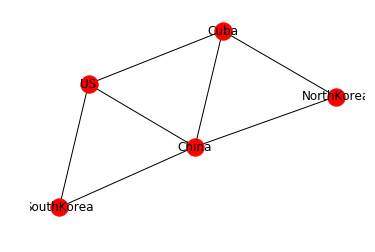

In [243]:
nx.draw_networkx(country_graph)
plt.axis('off')
plt.show()

There are several things to take note of here. First, when we print the nodes and edges, we include a
`data=True` argument in our calls to the `nodes()` and `edges()` functions. This tells NetworkX that we want the list of nodes/edges including the attributes, rather than just the nodes/edges on their own. As we see from the output, this changes the structure of the outputs from `nodes()` and `edges()`, where now each node is represented as a (node, attributes) tuple and each edge is represented as a (first node, second node, attributes) 3-tuple. The attributes data is in the form of a dictionary, which is just a mapping from keys to values. So for example in the node attributes 'gdp_per_capita' is a key, which is mapped to the particular integer value representing the per capita GDP for that node.

## An Aside: Dictionaries in Python
As mentioned above, a dictionary data structure is a mapping from keys to values, where each
key is associated with one and only one value. In practice, dictionaries are created/modified in Python as follows:

In [244]:
import datetime

# Create a new (empty) dictionary
car_dict = {}

# Create a new dictionary with specified mappings
name_dict = {'first_name': 'Jeff', 'last_name': 'Jacobs', 'birth_year': 1990}
car_dict['make'] = 'Toyota'
car_dict['model'] = 'Camry'

# Map 'date_of_sale' to January 1st, 2008
car_dict['date_of_sale'] = datetime.date(2008,1,1)

And then used like:

In [245]:
print(name_dict['first_name'])
print(car_dict['date_of_sale'].year)
print(car_dict['date_of_sale'].month)

Jeff
2008
1


## Extracting Subgraphs

Now that we've learned how to associate attributes with nodes/edges, we can start to do some really
cool stuff. For example, say we want to "zoom in" on the network and analyze just the relationships among the non-OECD nations with per capita GDP between \$10,000 and \$40,000 USD (pretend we have a way bigger network with all the countries, and this becomes a little more interesting). With a single line, using NetworkX's `subgraph()` function and Python list comprehensions, we can construct this subnetwork as follows:

In [246]:
sub_net = country_graph.subgraph([n for (n,d) in country_graph.nodes(data=True)
  if not d['oecd'] and d['gdp_per_capita'] >= 10000 and d['gdp_per_capita'] <= 40000])

which produces:

In [247]:
print("Nodes: " + str(sub_net.nodes(data=True)))
print("Edges: " + str(sub_net.edges(data=True)))

Nodes: [('Cuba', {'oecd': False, 'gdp_per_capita': 10200}), ('China', {'oecd': False, 'gdp_per_capita': 12900}), ('SouthKorea', {'oecd': False, 'gdp_per_capita': 35400})]
Edges: [('Cuba', 'China', {'since': 1960}), ('China', 'SouthKorea', {'since': 1992})]


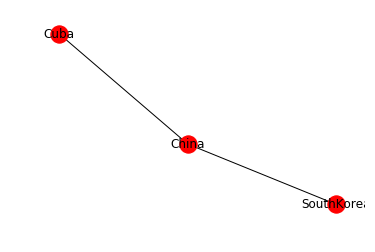

In [254]:
nx.draw_networkx(sub_net)
plt.axis('off')
plt.show()

## Aside 2 (Electric Boogaloo): List Comprehensions

As seen above, "list comprehensions" are Python statements of the form

`[f(x) for x in y if g(x)]`

Where `f(x)` is an arbitrary function, while `g(x)` is a function which evaluates to `True` or `False`. For
example, if we had a list of numbers

In [255]:
y = [1,2,3,4,5,6,7,8,9]

and we wanted to extract only the *even* numbers, we could use a list comprehension as follows:

In [169]:
evens = [x for x in y if x % 2 == 0]
evens

[2, 4, 6, 8]

Notice that in this case our `f(x)` function was just the identity function `f(x) = x`. If we wanted to get fancier, we could use `f(x) = x`$^2$:

In [170]:
squared_evens = [x**2 for x in y if x % 2 == 0]
squared_evens

[4, 16, 36, 64]

Or we could use a function which *doesn't* evaluate to a number:

In [171]:
string_evens = [str(x) for x in y if x % 2 == 0]
string_evens

['2', '4', '6', '8']

## Subnetworks from Edges

Similarly, utilizing the edge attributes (and the `add_nodes_from()` and `add_edges_from()` functions) we can create a subnetwork representing the relationships among these countries in 1975:

In [172]:
edges_1975 = [(n1,n2,d) for (n1,n2,d) in country_graph.edges(data=True) if d['since'] <= 1975]
net_1975 = nx.Graph()
net_1975.add_nodes_from(country_graph.nodes(data=True))
net_1975.add_edges_from(edges_1975)

In [256]:
print("Nodes: " + str(net_1975.nodes(data=True)))
print("Edges: " + str(net_1975.edges(data=True)))

Nodes: [('US', {'oecd': True, 'gdp_per_capita': 54800}), ('Cuba', {'oecd': False, 'gdp_per_capita': 10200}), ('China', {'oecd': False, 'gdp_per_capita': 12900}), ('NorthKorea', {'oecd': False, 'gdp_per_capita': 1800}), ('SouthKorea', {'oecd': False, 'gdp_per_capita': 35400})]
Edges: [('US', 'SouthKorea', {'since': 1948}), ('Cuba', 'China', {'since': 1960}), ('Cuba', 'NorthKorea', {'since': 1960}), ('China', 'NorthKorea', {'since': 1949})]


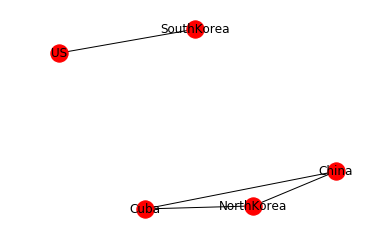

In [258]:
nx.draw_networkx(net_1975)
plt.axis('off')
plt.show()

# Computing Network Statistics

In [179]:
deg_cent = nx.degree_centrality(country_graph)
print("Degree Centralities:\n" + str(deg_cent))
print()
print("Diameter: " + str(nx.diameter(country_graph)))
print()
#print("Diameter of 1975 network: " + str(nx.diameter(net_1975)))
degrees = {}
for node_num, node in enumerate(country_graph.nodes()):
    print("Node " + str(node_num) + " = " + node)
    print("Degree(" + node + ") = " + str(country_graph.degree(node)))
    degrees[node] = country_graph.degree(node)
    
print()
print("All Degrees: " + str(degrees))

Degree Centralities:
{'US': 0.75, 'Cuba': 0.75, 'China': 1.0, 'NorthKorea': 0.5, 'SouthKorea': 0.5}

Diameter: 2

Node 0 = US
Degree(US) = 3
Node 1 = Cuba
Degree(Cuba) = 3
Node 2 = China
Degree(China) = 4
Node 3 = NorthKorea
Degree(NorthKorea) = 2
Node 4 = SouthKorea
Degree(SouthKorea) = 2

All Degrees: {'US': 3, 'Cuba': 3, 'China': 4, 'NorthKorea': 2, 'SouthKorea': 2}


# Visualizing Networks

From the above code, you'll see that one simple function, `draw_networkx()`, is really doing all the work here. The three steps to producing any network visualization are as follows:
1. Import the matplotlib library via `import matplotlib.pyplot as plt` (this only needs to be done once, at the beginning of the file/notebook).
2. Call the `draw_networkx()` function, specifying the graph style via the arguments to this function (see below).
3. Call `plt.axis('off')` to remove the x and y axis labels (which we'd want for things like scatterplots but not for graph visualizations). 
4. Call `plt.show()` to create a popup window (or, in a Jupyter notebook, an image) displaying the visualization. Alternatively, to save the visualization to an image file rather than popping it up in a window, call `plt.savefig(filename)`.

The most important arguments to the `draw()` function are:
* `with_labels`: if `True`, will label each node with a String representation of the node
* `arrows`: if `True`, will put an (ugly) "arrowhead" on directed edges, showing their directionality

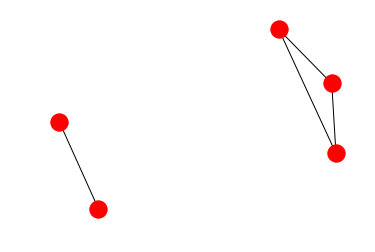

In [64]:
nx.draw_networkx(net_1975, with_labels=False)
plt.axis('off')
plt.show()

# Exporting Data

## Network Statistics Dataset

First, let's take the network statistics we computed above and export them to a country-level dataset in .csv format

In [ ]:
import pandas as pd
network_df = pd.DataFrame()


## Adjacency List Format

The simplest way to represent a network is as an "adjacency list", where in each row the first element represents a node, and every subsequent element in the row is a node connected to the first node. Sadly, this format is too simple to allow representation of node attributes :(

In [185]:
nx.write_adjlist(country_graph,"adj.txt")
list(nx.generate_adjlist(country_graph))

['US Cuba China SouthKorea',
 'Cuba China NorthKorea',
 'China NorthKorea SouthKorea',
 'NorthKorea',
 'SouthKorea']

## Edge List Format

In this format, every line represents an edge, and the first two elements on each line are the names of two nodes connected by an edge. This format *does* allow us to represent edge attributes.

In [259]:
# Without edge attributes
nx.write_edgelist(country_graph,"edges.txt", data=False)
print(list(nx.generate_edgelist(country_graph, data=False)))
# With edge attributes
nx.write_edgelist(country_graph,"edges_data.txt", data=True)

['US Cuba', 'US China', 'US SouthKorea', 'Cuba China', 'Cuba NorthKorea', 'China NorthKorea', 'China SouthKorea']


## Exporting to Gephi

Though `draw_networkx()` is nice for quick visualizations of "what's going on" in your networks, for advanced visualization I recommend using Gephi (https://gephi.org/), a free and open-source network visualization tool. Gephi uses .gexf files as its input format, so here we'll export our graph to this format using NetworkX's `write_gexf()` function:

In [260]:
nx.write_gexf(country_graph, 'country_graph.gexf')

# Working With (Real) Data

Now that we've learned how to construct networks from scratch, let's move to a more realistic situation, where you'd like to load data from a file and create a network to represent some features of the data you're hoping to analyze. For this part, I'll download some raw data from https://voteview.com/data and turn it into a network using NetworkX

In [266]:
senate = nx.Graph()

# 100 = Dem, 200 = Repub, 328 = Indep
# (we could have merged this info in programmatically too)
party_code_map = {100:'D',200:'R',328:'I'}

# import pandas as pd
# Make a node for each Senator
votes_df = pd.read_csv("S115_members.csv")
for row_num, senator_info in votes_df.iterrows():
    # Party code
    cur_pcode = senator_info["party_code"]
    #print(pcode)
    cur_party = party_code_map[cur_pcode]
    
    # Name
    cur_name = senator_info["bioname"]
    #print(name)
    
    # ICPSR code
    cur_icpsr = senator_info["icpsr"]
    #print(senator_info["icpsr"])
    
    # State
    cur_state = senator_info["state_abbrev"]
    #print(senator_info["state_abbrev"])
    
    # Construct the node
    senate.add_node(cur_icpsr, party=cur_party, name=cur_name, state=cur_state)
    
print(senate.nodes(data=True)[0:10])

[(41704, {'party': 'R', 'name': 'STRANGE, Luther  Johnson, III', 'state': 'AL'}), (49700, {'party': 'R', 'name': 'SESSIONS, Jefferson Beauregard III (Jeff)', 'state': 'AL'}), (94659, {'party': 'R', 'name': 'SHELBY, Richard C.', 'state': 'AL'}), (40300, {'party': 'R', 'name': 'MURKOWSKI, Lisa', 'state': 'AK'}), (41500, {'party': 'R', 'name': 'SULLIVAN, Daniel Scott', 'state': 'AK'}), (15039, {'party': 'R', 'name': 'McCAIN, John Sidney, III', 'state': 'AZ'}), (20100, {'party': 'R', 'name': 'FLAKE, Jeff', 'state': 'AZ'}), (20101, {'party': 'R', 'name': 'BOOZMAN, John', 'state': 'AR'}), (21301, {'party': 'R', 'name': 'COTTON, Tom', 'state': 'AR'}), (41701, {'party': 'D', 'name': 'HARRIS, Kamala Devi', 'state': 'CA'})]


In [267]:
votes_df.head()

,congress,chamber,icpsr,state_icpsr,district_code,state_abbrev,party_code,occupancy,last_means,bioname,bioguide_id,born,died,dim1,dim2,log_likelihood,geo_mean_probability,number_of_votes,number_of_errors,conditional
0,115,Senate,41704,41,0,AL,200,NaN,NaN,"STRANGE, Luther Johnson, III",S001202,1953,NaN,0.648,0.178,-3.18248,0.97446,123,0,1
1,115,Senate,49700,41,0,AL,200,NaN,NaN,"SESSIONS, Jefferson Beauregard III (Jeff)",S001141,1946,NaN,0.549,0.130,-0.56654,0.97062,19,0,1
2,115,Senate,94659,41,0,AL,200,NaN,NaN,"SHELBY, Richard C.",S000320,1934,NaN,0.433,0.543,-2.28802,0.98784,187,0,1
3,115,Senate,40300,81,0,AK,200,NaN,NaN,"MURKOWSKI, Lisa",M001153,1957,NaN,0.207,-0.290,-22.09292,0.88569,182,5,1
4,115,Senate,41500,81,0,AK,200,NaN,NaN,"SULLIVAN, Daniel Scott",S001198,1964,NaN,0.463,0.139,-5.55684,0.96960,180,2,1


In [268]:
# 1 = Yea, 6 = Nay, 9 = Abstain
# even though this isn't reported anywhere on the site -__-
vote_code_map = {1:'Yea', 6:'Nay', 9:'Abstain'}

# Now edges between all Senators with weight = number of times they voted the same
votes_df = pd.read_csv("S115_votes.csv")
# Replace cast_code with vote
votes_df["vote"] = votes_df["cast_code"].apply(lambda x: vote_code_map[x] if x in vote_code_map else 'NA')
rolls_df = votes_df.groupby('rollnumber')
total_votes = len(rolls_df)
votes_df.head()

,congress,chamber,rollnumber,icpsr,cast_code,vote
0,115,Senate,1,14009,1,Yea
1,115,Senate,1,14226,1,Yea
2,115,Senate,1,14307,6,Nay
3,115,Senate,1,14435,6,Nay
4,115,Senate,1,14503,1,Yea


In [269]:
# Now the actual computation
import itertools

def updateWeights(same_vote_codes):
    vote_pairs = itertools.combinations(same_vote_codes, 2)
    for voter1, voter2 in vote_pairs:
        if not senate.has_edge(voter1, voter2):
            senate.add_edge(voter1, voter2, weight=1)
        else:
            senate[voter1][voter2]['weight'] += 1

for roll_num, roll_info in rolls_df:
    # Update yea voter links
    yea_voters = roll_info[roll_info["vote"] == "Yea"]
    #print(yea_voters)
    yea_codes = yea_voters["icpsr"].tolist()
    updateWeights(yea_codes)
    
    # Update nay voter links
    nay_voters = roll_info[roll_info["vote"] == "Nay"]
    #print(nay_voters)
    nay_codes = nay_voters["icpsr"].tolist()
    updateWeights(nay_codes)

In [270]:
#senate.edges(data=True)[:10]
#print(senate[49700][49703]) # Voted the same 16 times, weight = 16
#print(senate[49700][49308]) # Voted the same 4 times

Now let's look at which pairs of Senators are most and least agreeable

In [271]:
def nicePrintPairs(pairs_raw):
    name_strs = [name_map[pair[0]] + ", " + name_map[pair[1]] + ": " + str(pair[2]['weight']) for pair in pairs_raw]
    print('\n'.join(name_strs))

name_map = nx.get_node_attributes(senate, 'name')

highest_agreement = sorted(senate.edges(data=True), key=(lambda edge: edge[2]["weight"]), reverse=True)

print("Top 10 pairs by agreement:")
top10 = highest_agreement[:10]
nicePrintPairs(top10)
print()
print("Bottom 10 pairs by agreement:")
bottom10 = highest_agreement[-10:]
nicePrintPairs(bottom10)

Top 10 pairs by agreement:
ROBERTS, Charles Patrick (Pat), CORNYN, John: 208
ROBERTS, Charles Patrick (Pat), ROUNDS, Marion Michael (Mike): 208
ROUNDS, Marion Michael (Mike), CORNYN, John: 208
SHELBY, Richard C., ROBERTS, Charles Patrick (Pat): 207
SHELBY, Richard C., CORNYN, John: 207
SHELBY, Richard C., ROUNDS, Marion Michael (Mike): 207
BOOZMAN, John, ROBERTS, Charles Patrick (Pat): 207
BOOZMAN, John, THUNE, John: 207
BOOZMAN, John, CORNYN, John: 207
BOOZMAN, John, ROUNDS, Marion Michael (Mike): 207

Bottom 10 pairs by agreement:
SESSIONS, Jefferson Beauregard III (Jeff), TESTER, Jon: 4
SESSIONS, Jefferson Beauregard III (Jeff), COONS, Christopher A.: 4
SESSIONS, Jefferson Beauregard III (Jeff), BLUMENTHAL, Richard: 4
SESSIONS, Jefferson Beauregard III (Jeff), MURRAY, Patty: 4
SESSIONS, Jefferson Beauregard III (Jeff), GILLIBRAND, Kirsten: 3
SESSIONS, Jefferson Beauregard III (Jeff), MERKLEY, Jeff: 3
SESSIONS, Jefferson Beauregard III (Jeff), WARREN, Elizabeth: 3
SESSIONS, Jefferson

Next we could construct a subgraph where Senators are only connected if they voted the same greater than (say) 50% of the time. Then we could export this subgraph to Gephi, and look for the clusters - do they correlate with subcommittee? Geographic region? etc.

In [272]:
print(senate.number_of_nodes())
print(senate.number_of_edges())
nx.write_gexf(senate, 'senate.gexf')

101
5049


# Further Reading

[1] Bearman, Peter S., James Moody, and Katherine Stovel. 2004. "Chains of Affection: The Structure of
Adolescent Romantic and Sexual Networks". *American Journal of Sociology*, 110(1):44–91.

[2] Diani, Mario and Doug McAdam. 2003. *Social Movements and Networks: Relational Approaches to
Collective Action*. New York, NY: Oxford University Press.

[3] Easley, David and Jon Kleinberg. 2010. *Networks, Crowds, and Markets: Reasoning About a Highly
Connected World*. New York, NY: Cambridge University Press. Free online at http://www.cs.cornell.edu/home/kleinber/networks-book/networks-book.pdf

[4] Granovetter, Mark S. 1973. "The Strength of Weak Ties". *American Journal of Sociology*, 78(6):1360–1380.

[5] Hadden, Jennifer. 2015. *Networks in Contention: The Divisive Politics of Climate Change*. New York, NY: Cambridge University Press.

[6] Jackson, Matthew O. 2010. *Social and Economic Networks*. Princeton, NJ: Princeton University Press. First chapter online at http://web.stanford.edu/~jacksonm/netbook.pdf. [PDF
available upon request]

[7] Jackson, Mathhew O. and Stephen Nei. 2015. "Networks of Military Alliances, Wars, and International Trade". *Proceedings of the National Academy of Sciences*, 112(50):15277–15284.

[8] Padgett, John and Christopher Ansell. 1993. "Robust Action and the Rise of the Medici, 1400–1434".
*American Journal of Sociology*, 98(6):1259–1319.